In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [119]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


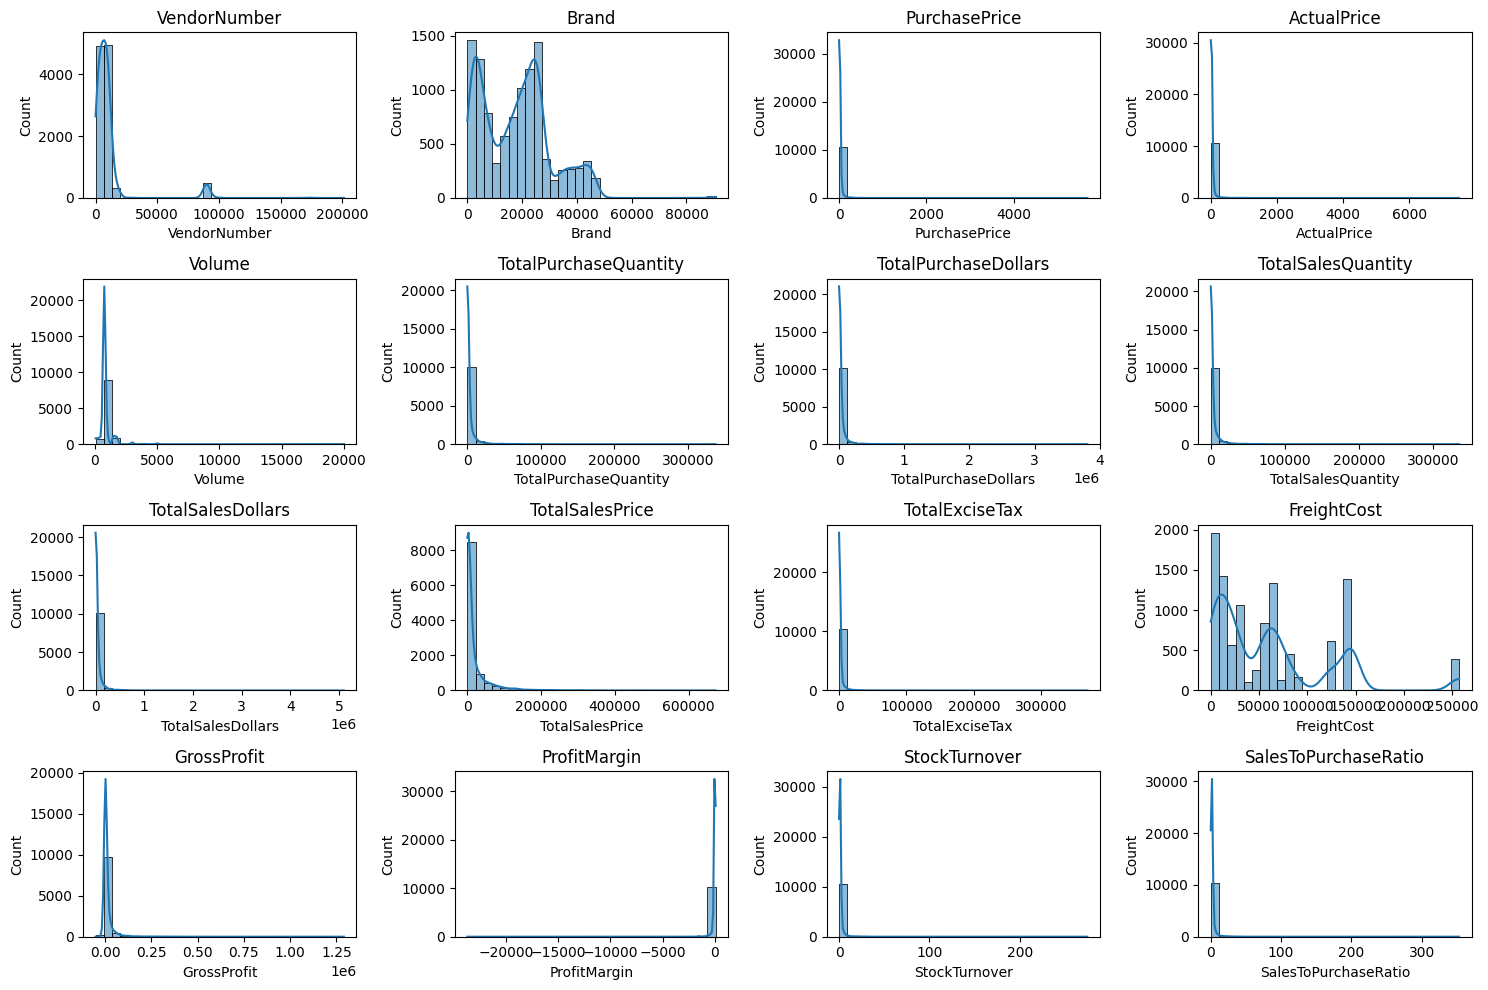

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True,bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

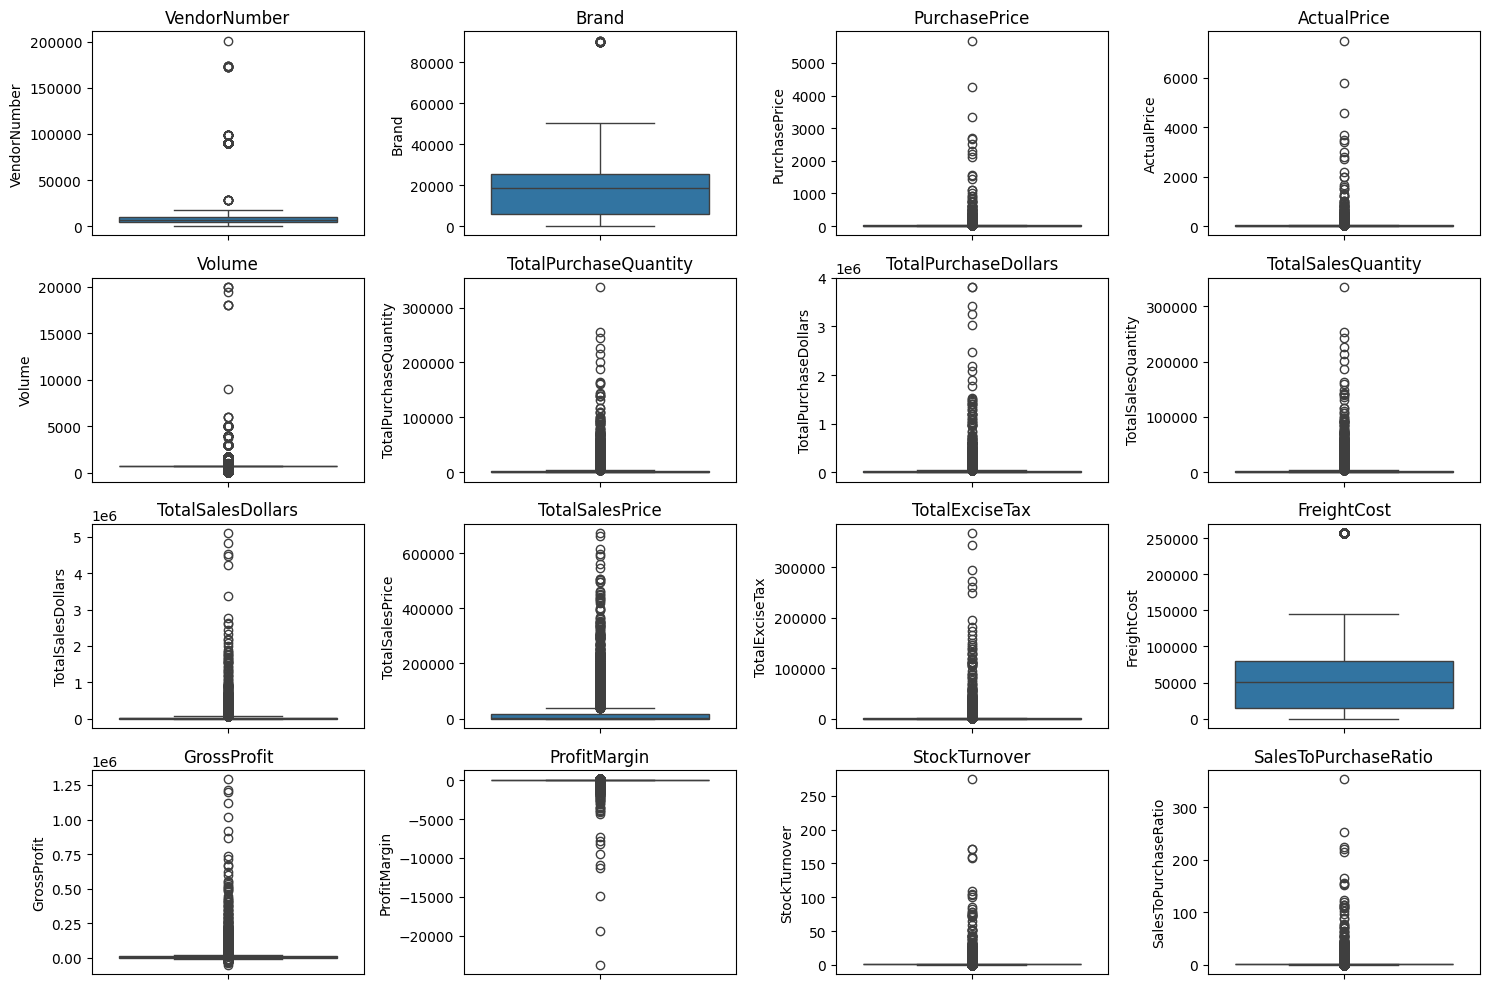

In [11]:
#Outlier Detection with Boxplots 
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols): 
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col]) 
    plt.title(col)
plt.tight_layout() 
plt.show()

In [13]:
df = pd.read_sql_query("select * from vendor_sales_summary where GrossProfit>0 and ProfitMargin>0 and TotalSalesQuantity>0",conn) 
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


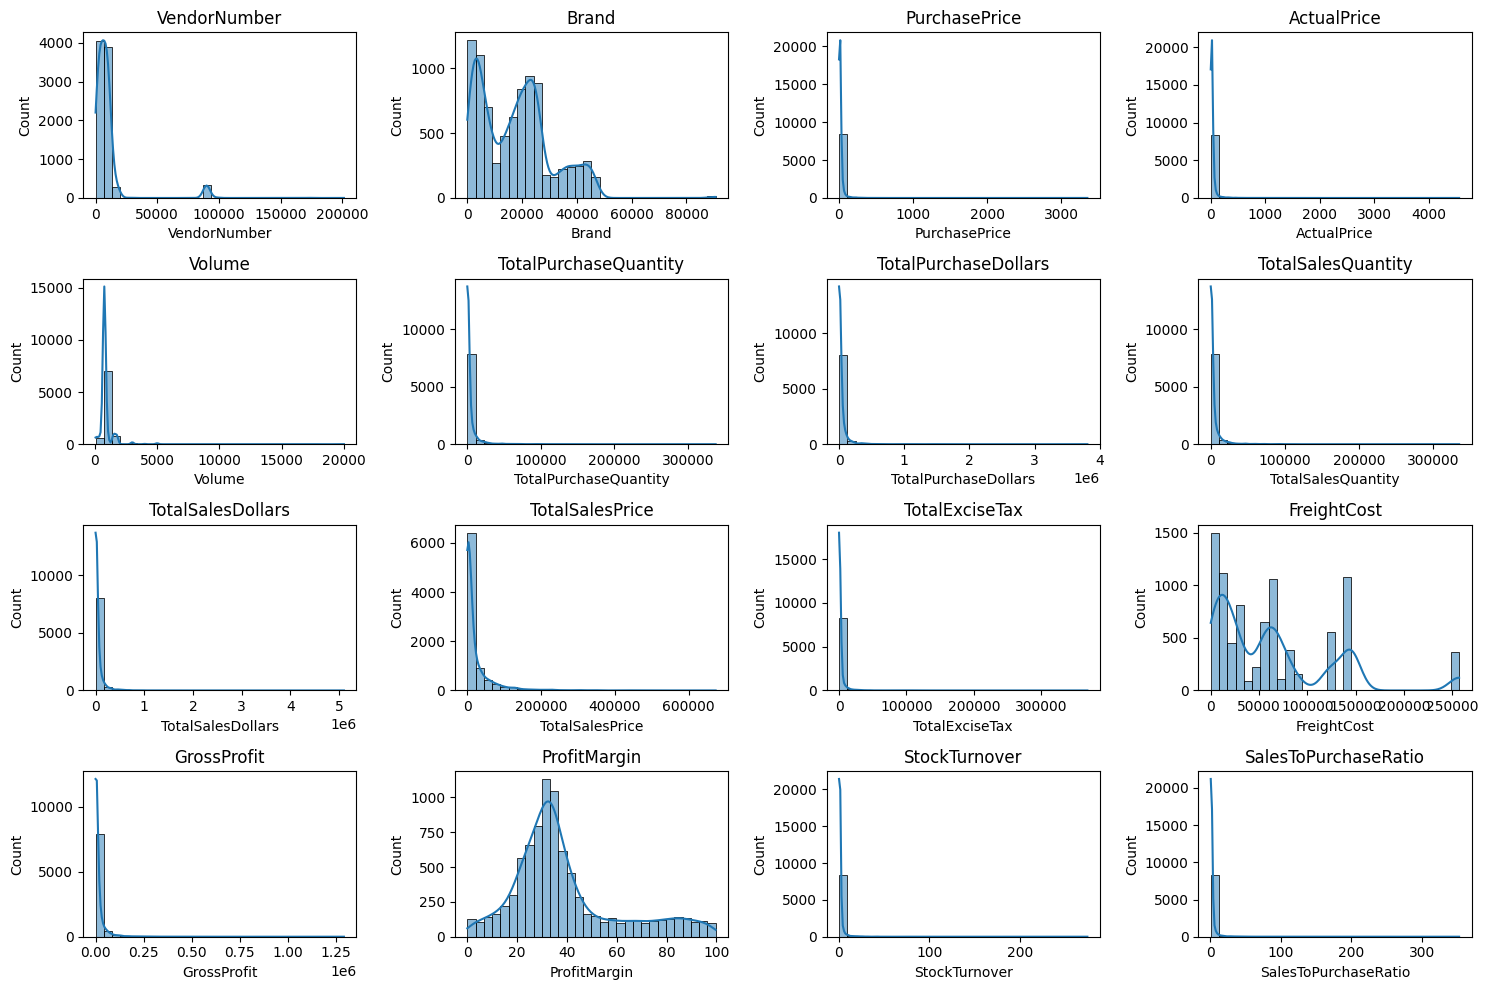

In [14]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde = True,bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

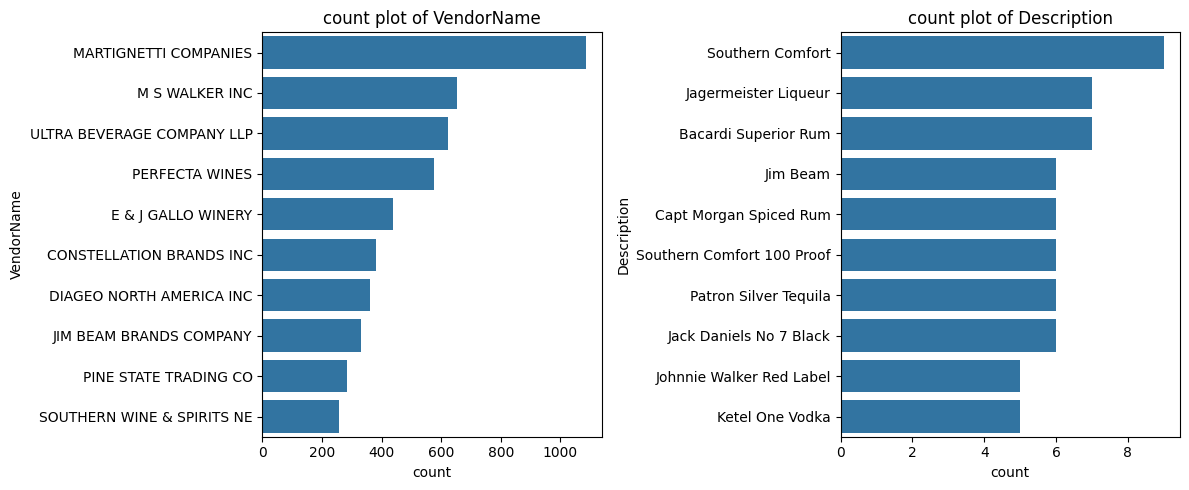

In [16]:
categorical_cols = ["VendorName","Description"]
plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order = df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

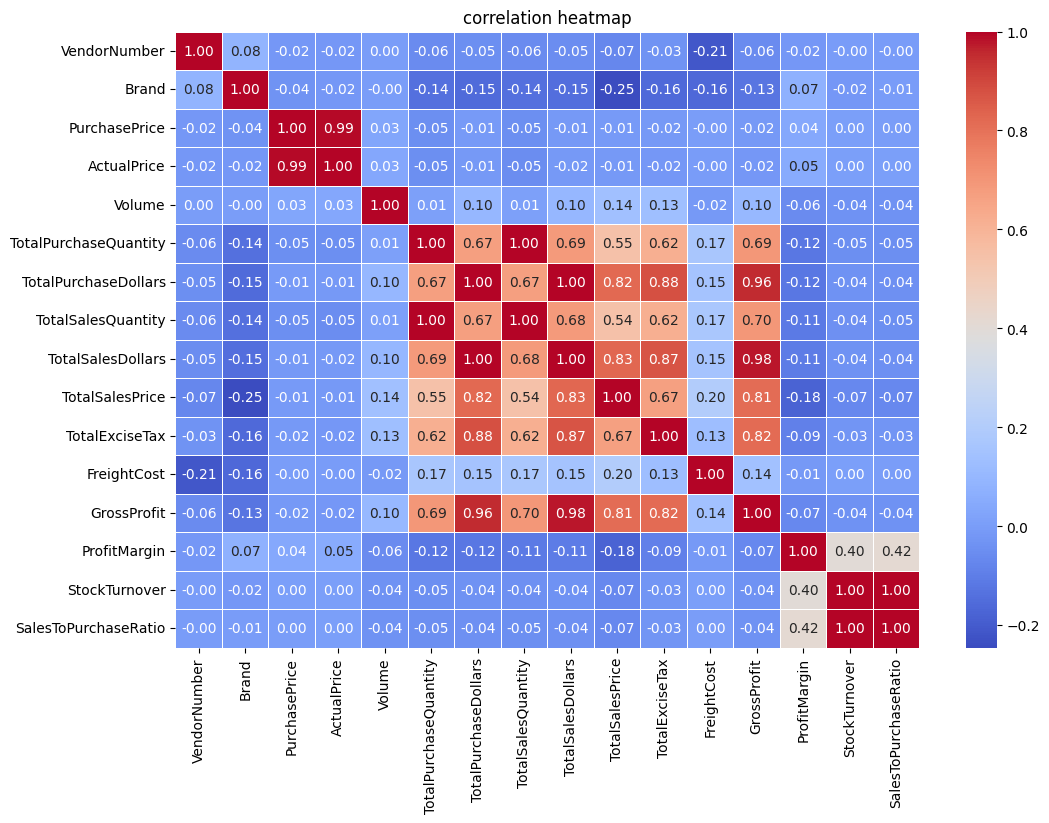

In [17]:
plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f",cmap = "coolwarm",linewidths = 0.5)
plt.title("correlation heatmap")
plt.show()

#Data Analysis:-
1) Identify brands that needs promotional or pricing adjustments which exhibit lower sales perfomance but higher profit margins


In [22]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()

In [34]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [35]:
low_sales_threshold

np.float64(560.299)

In [36]:
high_margin_threshold

np.float64(64.97017552750111)

In [38]:
target_brands = brand_performance[(brand_performance['TotalSalesDollars']<= low_sales_threshold) & (brand_performance['ProfitMargin']>=high_margin_threshold)]
print('Brands with low sales and higher profit margin: ')
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales and higher profit margin: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [45]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

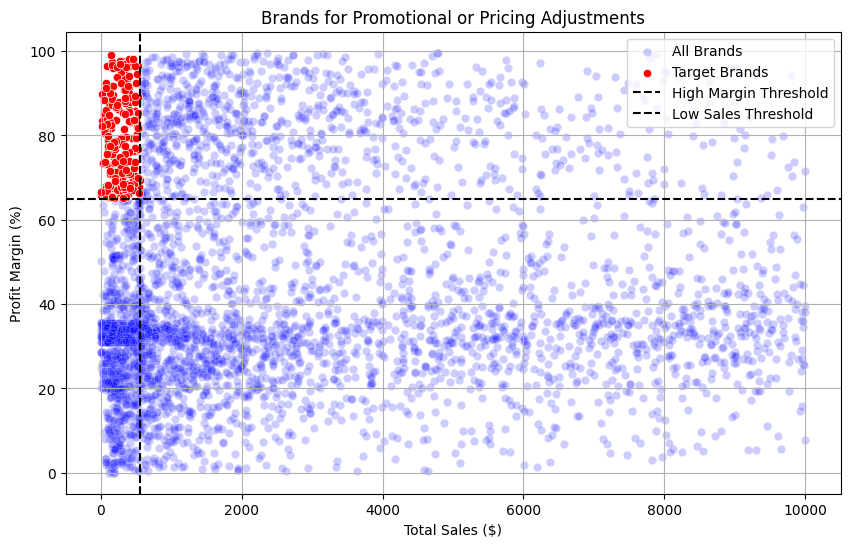

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2) 
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")
plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold") 
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Data Analysis:-
2) Which brands & vendors demonstrate the highest sales performance?

In [54]:
def format_dollars(value):
    if value>1_000_00:
        return f" {value/1_000_000:.2f}M"
    elif value>=1_000:
        return f" {value/1_000:.2f}K"
    else:
        return str(value)

In [55]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [56]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [57]:
top_brands.apply(lambda x : format_dollars (x))

Description
Jack Daniels No 7 Black     7.96M
Tito's Handmade Vodka       7.40M
Grey Goose Vodka            7.21M
Capt Morgan Spiced Rum      6.36M
Absolut 80 Proof            6.24M
Jameson Irish Whiskey       5.72M
Ketel One Vodka             5.07M
Baileys Irish Cream         4.15M
Kahlua                      3.60M
Tanqueray                   3.46M
Name: TotalSalesDollars, dtype: object

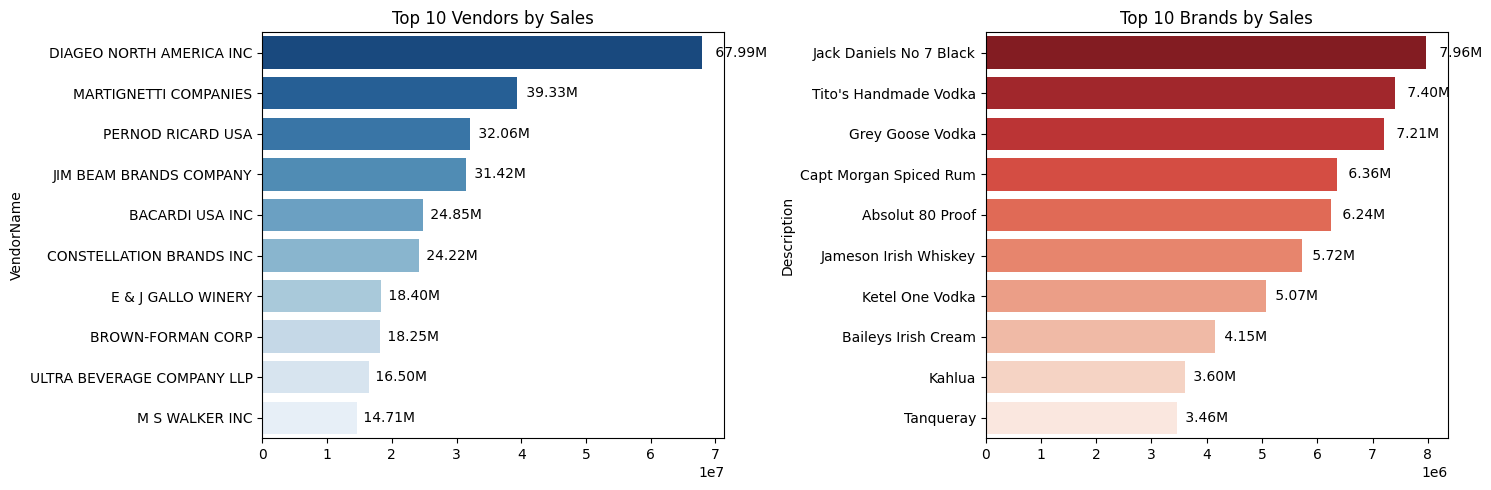

In [59]:
plt.figure(figsize=(15, 5))
# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r") 
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2,
             format_dollars (bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot (y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r") 
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), bar.get_y() + bar.get_height() / 2,
             format_dollars (bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [ ]:
#Data Analysis:-
3) Which vendors contribute the most to total purchase dollars?

In [63]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [74]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [75]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending = False),2)

In [76]:
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [77]:
top_vendors['Cummulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


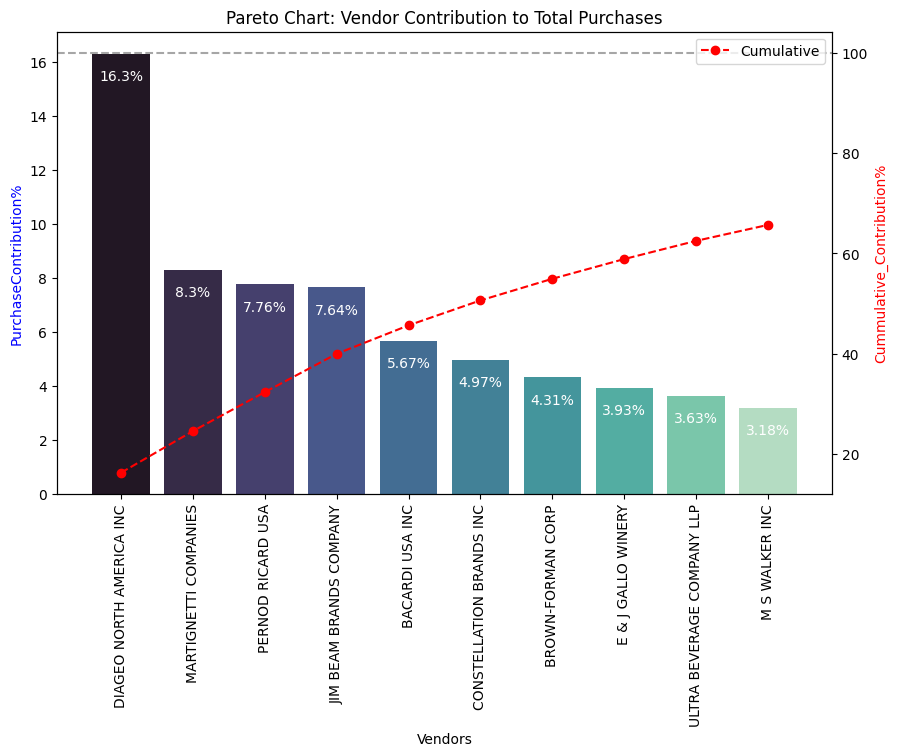

In [79]:
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)
for i, value in enumerate(top_vendors ['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')
#Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors['Cummulative_Contribution%'], color='red', marker='o', linestyle= 'dashed', label='Cumulative')
ax1.set_xticklabels (top_vendors ['VendorName'], rotation=90)
ax1.set_ylabel('PurchaseContribution%', color="blue") 
ax2.set_ylabel('Cummulative_Contribution%', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2. legend (loc='upper right')
plt.show()

#Data Analysis:-
4) How much of total procurement is dependent on the top vendors?

In [80]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


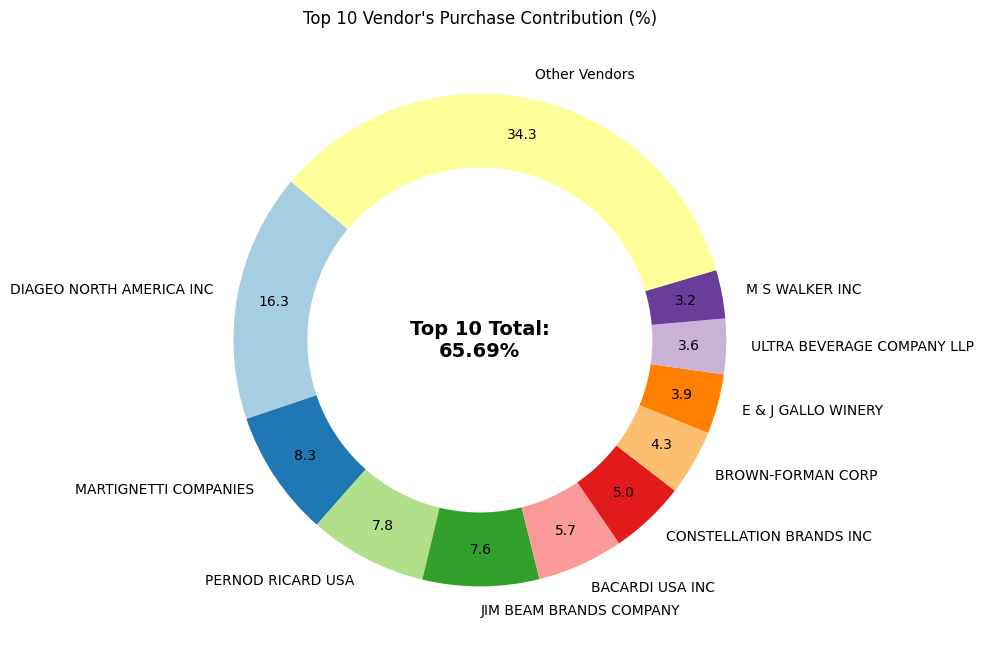

In [85]:
vendors = list(top_vendors["VendorName"].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values) 
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution
# Append "Other Vendors" category 
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)
# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f',
                                  startangle=140, pctdistance=0.85, colors=plt.cm. Paired.colors)
# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist (centre_circle)
# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

In [88]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [90]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"],q = 3,labels = ["Small","Medium","Large"])

In [93]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8560,Small,2
8561,Small,6
8562,Small,2
8563,Small,1


In [94]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


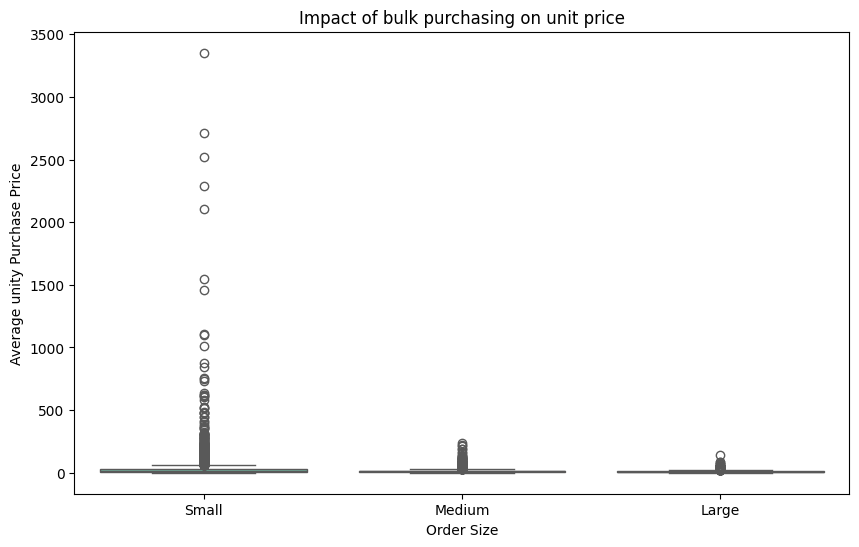

In [95]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'OrderSize',y = 'UnitPurchasePrice',palette = 'Set2')
plt.title("Impact of bulk purchasing on unit price")
plt.xlabel('Order Size')
plt.ylabel('Average unity Purchase Price')
plt.show()

#Data Analysis:-
5) Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [98]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#Data Analysis:-
6) How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [105]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital: ',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital:   2.71M


In [107]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()
# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor ['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars) 
inventory_value_per_vendor.head (10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,0.72M
46,JIM BEAM BRANDS COMPANY,0.55M
68,PERNOD RICARD USA,0.47M
116,WILLIAM GRANT & SONS INC,0.40M
30,E & J GALLO WINERY,0.23M
79,SAZERAC CO INC,0.20M
11,BROWN-FORMAN CORP,0.18M
20,CONSTELLATION BRANDS INC,0.13M
61,MOET HENNESSY USA INC,0.13M
77,REMY COINTREAU USA INC,0.12M


#Data Analysis:-
6) What is 95% confidence intervals for profit margins of top_performing and low-performing vendors?

In [108]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [110]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [112]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8560    83.448276
8561    96.436186
8562    25.252525
8563    98.974037
8564    99.166079
Name: ProfitMargin, Length: 2142, dtype: float64

In [114]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std (data, ddof=1) / np.sqrt(len(data)) # Standard error 
    t_critical = stats.t.ppf((1+ confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical*std_err
    return mean_val, mean_val-margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
Low Vendors 95% CI: (40.48,  42.62), Mean: 41.55


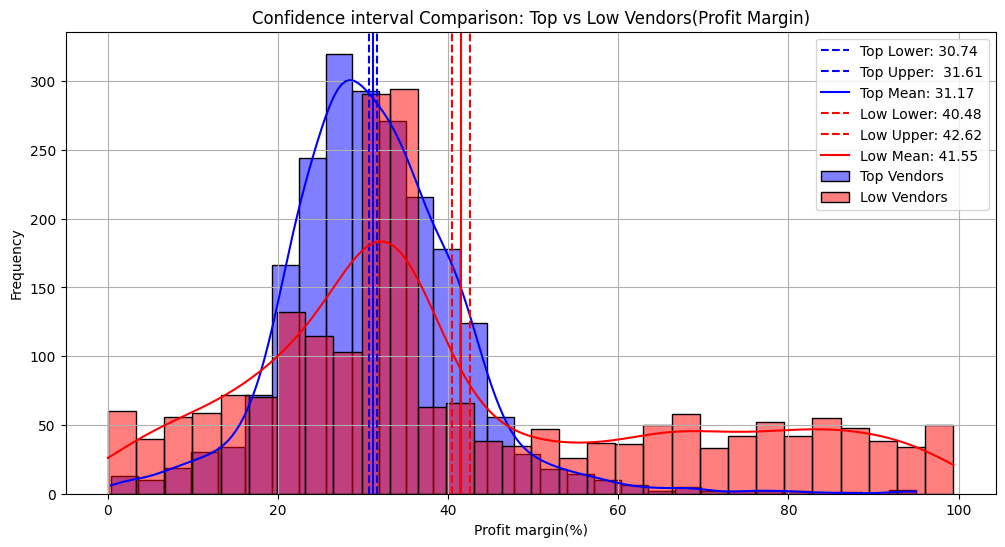

In [116]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors) 
low_mean, low_lower, low_upper = confidence_interval(low_vendors)
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}") 
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper: .2f}), Mean: {low_mean:.2f}")
plt.figure(figsize=(12, 6))
# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}") 
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper: .2f}") 
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")
# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors") 
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}") 
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}") 
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")
#finalize plot 
plt.title("Confidence interval Comparison: Top vs Low Vendors(Profit Margin)")
plt.xlabel("Profit margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [117]:
top_threshold = df ["TotalSalesDollars"].quantile (0.75)
low_threshold = df ["TotalSalesDollars"].quantile (0.25)
top_vendors = df [df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna() 
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()
# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind (top_vendors, low_vendors, equal_var=False)
# Print results
print (f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value<0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.


In [122]:
pd.read_sql_query("Select * from vendor_sales_summary",conn)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5.101920e+06,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


In [1]:
import pandas as pd
import sqlite3  # or your database connector (psycopg2, pymysql, etc.)

# Connect to your database
conn = sqlite3.connect('inventory.db')  # Replace with your connection

# Query the table and export to CSV
query = "SELECT * FROM vendor_sales_summary"
df = pd.read_sql_query(query, conn)
df.to_csv('vendor_sales_summary.csv', index=False)

# Close connection
conn.close()